<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #ffaa30;
            background-color:#317900;
            color: white;
            overflow:hidden;
            font-weight:500"><strong>SriOryzaugur:</strong> Temporal Fusion Transformer</div>
            
<center>
<img src="https://www.researchgate.net/publication/355916352/figure/fig1/AS:1086496828334080@1636052438065/Temporal-Fusion-Transformer-architecture-4.ppm" width=700>
</center>

# **Table of contents**

1. [Install Packages üì•](#packages)
2. [Import Packages üì©](#import)
3. [Loading Dataset and Feature Engineering üî¨](#feature_engineering)
4. [Test Train Split ü™ì](#split)
5. [Building and Training the Model üèóÔ∏è](#model)
6. [Testing üß™](#test)

# **1. Install Packages üì•** <a class='anchor' id='packages'></a> [‚Üë](#top)

In [1]:
!pip install torch pytorch-lightning pytorch_forecasting

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 140.4/140.4 kB 2.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.8/1.8 MB 19.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 114.9/114.9 kB 12.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 69.7/69.7 kB 7.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 557.1/557.1 kB 43.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55.5/55.5 kB 5.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

# **2. Import Packages üì©** <a class='anchor' id='import'></a> [‚Üë](#top)

In [2]:
import copy
from pathlib import Path
import pickle
import warnings
import seaborn as sns
import matplotlib

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.style.use("bmh")

import numpy as np
import pandas as pd

import lightning.pytorch as pl
from lightning.pytorch.tuner import Tuner

import torch
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer, NaNLabelEncoder
from pytorch_forecasting.metrics import MAE, SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters
import random
import gc
import tensorflow as tf 
import tensorboard as tb 
tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

import warnings
warnings.filterwarnings('ignore')

random.seed(30)
np.random.seed(30)
tf.random.set_seed(30)
torch.manual_seed(30)
torch.cuda.manual_seed(30)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
DEVICE

'cuda'

# **3. Loading Dataset and Feature Engineering üî¨** <a class='anchor' id='feature_engineering'></a> [‚Üë](#top)

In [4]:
df = pd.read_csv('/kaggle/input/sri-oryzaugur-dataset/imputed_processed_data.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] < '2020-01-01']
df = df[['date', 'price', 'anuradhapura_producer_price', 'kurunegala_producer_price', 'polonnaruwa_producer_price', 'exchange_rate', 'm1']]
df

date   price  anuradhapura_producer_price  \
0   1996-01-01   18.07                         7.75   
1   1996-02-01   18.70                         8.17   
2   1996-03-01   18.49                         7.95   
3   1996-04-01   18.52                         8.25   
4   1996-05-01   19.02                         8.38   
..         ...     ...                          ...   
283 2019-08-01   89.06                        43.58   
284 2019-09-01   92.08                        45.50   
285 2019-10-01   96.74                        49.98   
286 2019-11-01   99.21                        52.11   
287 2019-12-01  103.29                        54.57   

     kurunegala_producer_price  polonnaruwa_producer_price  exchange_rate  \
0                        7.900                       8.180         53.685   
1                        8.260                       8.760         53.685   
2                        7.850                       7.990         53.685   
3                        8.010                       8.290         54.735   
4                        8.500                       8.340         54.950   
..                         ...                         ...            ...   
283                     43.600                      46.185        179.200   
284                     46.654                      49.630        182.000   
285                     49.708                      51.310        181.050   
286                     51.250                      51.480        180.850   
287                     53.450                      54.530        181.300   

         m1  
0     73783  
1     77440  
2     81796  
3     79478  
4     76620  
..      ...  
283  818128  
284  843070  
285  810596  
286  817647  
287  865467  

[288 rows x 7 columns]

In [5]:
df = df.set_index('date')

df = df.copy()

avgs = df.mean()
devs = df.std()

for col in df.columns:
    df[col] = (df[col] - avgs.loc[col]) / devs.loc[col]

df.reset_index(drop=False, inplace=True)

df

date     price  anuradhapura_producer_price  \
0   1996-01-01 -1.327724                    -1.233085   
1   1996-02-01 -1.302855                    -1.199386   
2   1996-03-01 -1.311144                    -1.217038   
3   1996-04-01 -1.309960                    -1.192967   
4   1996-05-01 -1.290223                    -1.182536   
..         ...       ...                          ...   
283 2019-08-01  1.474554                     1.641783   
284 2019-09-01  1.593766                     1.795837   
285 2019-10-01  1.777717                     2.155296   
286 2019-11-01  1.875218                     2.326199   
287 2019-12-01  2.036273                     2.523580   

     kurunegala_producer_price  polonnaruwa_producer_price  exchange_rate  \
0                    -1.238532                   -1.202460      -1.780339   
1                    -1.210139                   -1.156829      -1.780339   
2                    -1.242475                   -1.217408      -1.780339   
3                    -1.229856                   -1.193806      -1.747144   
4                    -1.191210                   -1.189872      -1.740347   
..                         ...                         ...            ...   
283                   1.577126                    1.787546       2.187719   
284                   1.817994                    2.058578       2.276239   
285                   2.058863                    2.190750       2.246205   
286                   2.180481                    2.204125       2.239883   
287                   2.353995                    2.444081       2.254109   

           m1  
0   -1.100574  
1   -1.085641  
2   -1.067855  
3   -1.077320  
4   -1.088990  
..        ...  
283  1.938706  
284  2.040548  
285  1.907951  
286  1.936742  
287  2.131998  

[288 rows x 7 columns]

In [6]:
# list of column names to concatenate
series_to_merge = df.iloc[:, 1:].columns
num_of_series = len(series_to_merge)

In [7]:
# concatenate columns based on column names in cols_to_concat
combined_series = pd.concat([df[col] for col in series_to_merge], ignore_index=True)
combined_series.name = 'y'
combined_series = pd.DataFrame(combined_series)
combined_series

y
0    -1.327724
1    -1.302855
2    -1.311144
3    -1.309960
4    -1.290223
...        ...
1723  1.938706
1724  2.040548
1725  1.907951
1726  1.936742
1727  2.131998

[1728 rows x 1 columns]

In [8]:
combined_series['ds'] = pd.concat([df['date']] * num_of_series).reset_index(drop=True)
combined_series

y         ds
0    -1.327724 1996-01-01
1    -1.302855 1996-02-01
2    -1.311144 1996-03-01
3    -1.309960 1996-04-01
4    -1.290223 1996-05-01
...        ...        ...
1723  1.938706 2019-08-01
1724  2.040548 2019-09-01
1725  1.907951 2019-10-01
1726  1.936742 2019-11-01
1727  2.131998 2019-12-01

[1728 rows x 2 columns]

In [9]:
series_arr = np.arange(num_of_series).reshape(-1, 1)
combined_series['series'] = np.repeat(series_arr, combined_series.shape[0]/num_of_series)
combined_series['series'] = combined_series['series'].astype(str)
combined_series

y         ds series
0    -1.327724 1996-01-01      0
1    -1.302855 1996-02-01      0
2    -1.311144 1996-03-01      0
3    -1.309960 1996-04-01      0
4    -1.290223 1996-05-01      0
...        ...        ...    ...
1723  1.938706 2019-08-01      5
1724  2.040548 2019-09-01      5
1725  1.907951 2019-10-01      5
1726  1.936742 2019-11-01      5
1727  2.131998 2019-12-01      5

[1728 rows x 3 columns]

In [10]:
combined_series = (combined_series.merge((combined_series[['ds']].drop_duplicates(ignore_index=True).rename_axis('time_idx')).reset_index(), on = ['ds']))
combined_series['month'] = combined_series['ds'].dt.month
combined_series['year'] = combined_series['ds'].dt.year

def classify_yaha_mala(row):
    month = row['month']
    
    if month >= 10 or month <= 4:
        return 'maha'
    else:
        return 'yala'
    
combined_series["season"] = combined_series.apply(classify_yaha_mala, axis=1)
combined_series

y         ds series  time_idx  month  year season
0    -1.327724 1996-01-01      0         0      1  1996   maha
1    -1.233085 1996-01-01      1         0      1  1996   maha
2    -1.238532 1996-01-01      2         0      1  1996   maha
3    -1.202460 1996-01-01      3         0      1  1996   maha
4    -1.780339 1996-01-01      4         0      1  1996   maha
...        ...        ...    ...       ...    ...   ...    ...
1723  2.523580 2019-12-01      1       287     12  2019   maha
1724  2.353995 2019-12-01      2       287     12  2019   maha
1725  2.444081 2019-12-01      3       287     12  2019   maha
1726  2.254109 2019-12-01      4       287     12  2019   maha
1727  2.131998 2019-12-01      5       287     12  2019   maha

[1728 rows x 7 columns]

# **4. Test Train Split** ü™ì <a class='anchor' id='split'></a> [‚Üë](#top)

In [11]:
train = combined_series.copy()

max_prediction_length = 12
max_encoder_length = 60
training_cutoff = train["time_idx"].max() - max_prediction_length

print(max_encoder_length)
print(training_cutoff)

60
275


In [12]:
train.tail()

y         ds series  time_idx  month  year season
1723  2.523580 2019-12-01      1       287     12  2019   maha
1724  2.353995 2019-12-01      2       287     12  2019   maha
1725  2.444081 2019-12-01      3       287     12  2019   maha
1726  2.254109 2019-12-01      4       287     12  2019   maha
1727  2.131998 2019-12-01      5       287     12  2019   maha

In [13]:
# Let's create a Dataset
training = TimeSeriesDataSet(
    train[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="y",
    group_ids=['series'], 
    min_encoder_length=max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=['series', 'season'],
    time_varying_known_reals=['month', 'year'],
    time_varying_unknown_reals=['y'],
    categorical_encoders={'series': NaNLabelEncoder().fit(combined_series.series)},
    lags={'y': [3, 6, 12]},
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True, 
)

# create validation set (predict=True) which means to predict the last max_prediction_length points in time
# for each series
validation = TimeSeriesDataSet.from_dataset(training, train, predict=True, stop_randomization=True)

# create dataloaders for model
batch_size = 64  # set this between 32 to 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

In [14]:
# create a new study
study = optimize_hyperparameters(
    train_dataloader,
    val_dataloader,
    model_path="optuna_test",
    n_trials=10,
    max_epochs=50,
    gradient_clip_val_range=(0.01, 1.0),
    hidden_size_range=(30, 128),
    hidden_continuous_size_range=(30, 128),
    attention_head_size_range=(1, 4),
    learning_rate_range=(0.001, 0.1),
    dropout_range=(0.1, 0.3),
    reduce_on_plateau_patience=4,
    use_learning_rate_finder=False,
)

# save study results
with open("test_study.pkl", "wb") as fout:
    pickle.dump(study, fout)

hyperparams = study.best_trial.params

# print best hyperparameters
print(hyperparams)

[I 2023-05-04 19:04:41,878] A new study created in memory with name: no-name-d39f8b11-ec27-4955-a3f5-9c11636f9d85
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[I 2023-05-04 19:08:46,451] Trial 0 finished with value: 0.1943848729133606 and parameters: {'gradient_clip_val': 0.09693170357294117, 'hidden_size': 38, 'dropout': 0.17588061828734455, 'hidden_continuous_size': 35, 'attention_head_size': 3, 'learning_rate': 0.0038714531579644006}. Best is trial 0 with value: 0.1943848729133606.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[I 2023-05-04 19:12:41,467] Trial 1 finished with value: 0.1383199244737625 and parameters: {'gradient_clip_val': 0.10609967129736605, 'hidden_size': 75, 'dropout': 0.29252468219587935, 'hidden_continuous_size': 45, 'attention_head_size': 1, 'learning_rate': 0.05923484582980736}. Best is trial 1 with value: 0.1383199244737625.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[I 2023-05-04 19:16:37,347] Trial 2 finished with value: 0.13595162332057953 and p

{'gradient_clip_val': 0.02823408035485869, 'hidden_size': 33, 'dropout': 0.1520709260560915, 'hidden_continuous_size': 32, 'attention_head_size': 1, 'learning_rate': 0.002915676521660861}


In [15]:
hyperparams = {
    "gradient_clip_val": 0.38097987175394893,
    "hidden_size": 50,
    "dropout": 0.21903813943096812,
    "hidden_continuous_size": 46,
    "attention_head_size": 1,
    "learning_rate": 0.01551764398349418
}

> {
>     "gradient_clip_val": 0.38097987175394893,
>     "hidden_size": 50,
>     "dropout": 0.21903813943096812,
>     "hidden_continuous_size": 46,
>     "attention_head_size": 1,
>     "learning_rate": 0.01551764398349418
> }

In [16]:
pl.seed_everything(42)
trainer = pl.Trainer(
    accelerator=DEVICE,
    gradient_clip_val=0.1,
)

tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=8,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    loss=QuantileLoss(),
    optimizer="Ranger"
)

INFO: Global seed set to 42


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO: Learning rate set to 0.2884031503126607


suggested learning rate: 0.2884031503126607


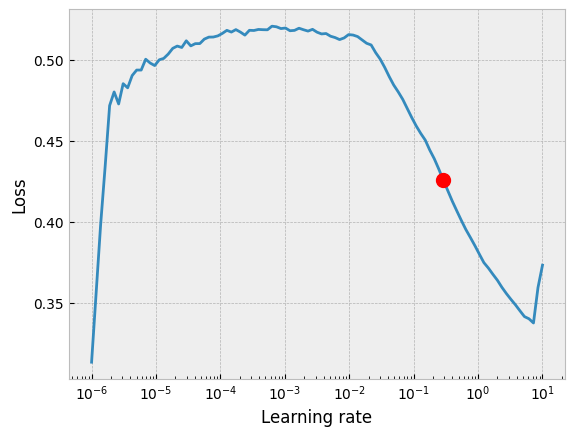

In [17]:
res = Tuner(trainer).lr_find(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
    max_lr=10.0,
    min_lr=1e-6,
)

learning_rate = res.suggestion()
print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

# **5. Building and Training the Model üèóÔ∏è** <a class='anchor' id='model'></a> [‚Üë](#top)

In [18]:
trainer = pl.Trainer(
    max_epochs=200,
    accelerator='gpu',
    devices=1,
    enable_model_summary=False,
    gradient_clip_val=hyperparams['gradient_clip_val'],
    callbacks=[],
)

tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=hyperparams['learning_rate'],
    hidden_size=hyperparams['hidden_size'],
    attention_head_size=hyperparams['attention_head_size'],
    dropout=hyperparams['dropout'],
    hidden_continuous_size=hyperparams['hidden_continuous_size'],
    output_size=7,
    loss=QuantileLoss(),
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

Number of parameters in network: 267.0k


In [19]:
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

# **6. Testing üß™** <a class='anchor' id='testing'></a> [‚Üë](#top)

In [20]:
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])

forecasts = tft.predict(val_dataloader, return_x=True, return_y=True, trainer_kwargs=dict(accelerator="cpu"))
raw_forecasts = tft.predict(val_dataloader, mode="raw", return_x=True)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


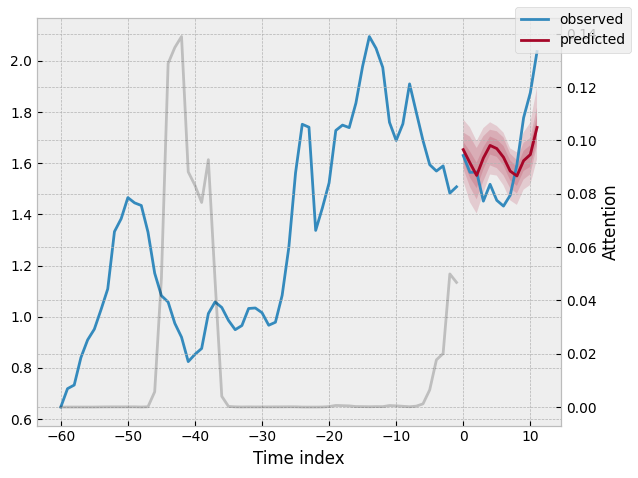

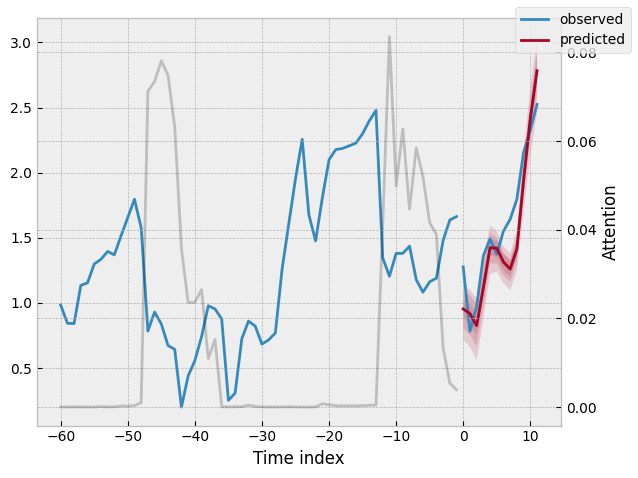

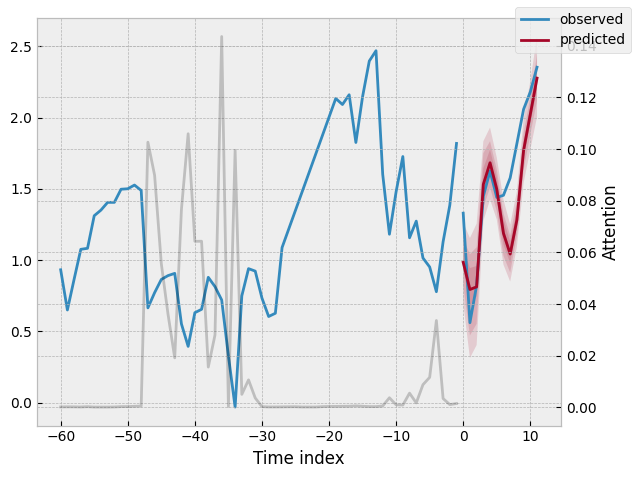

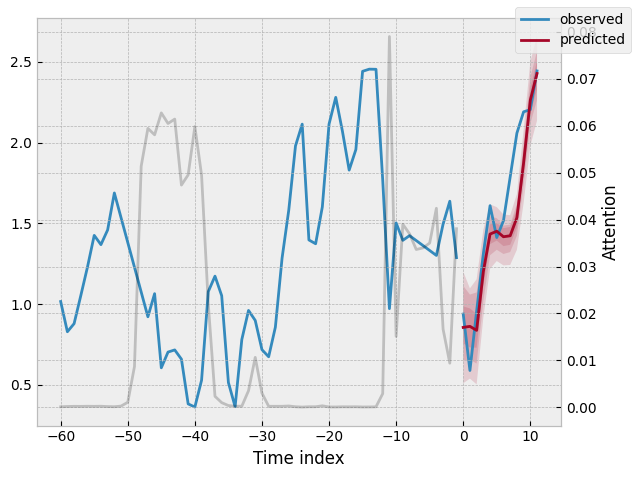

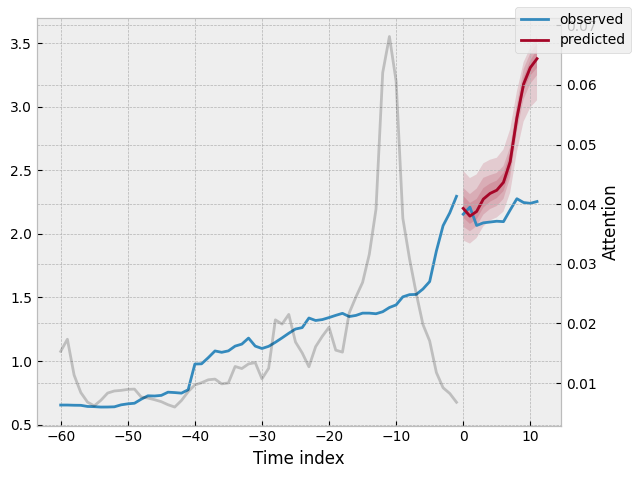

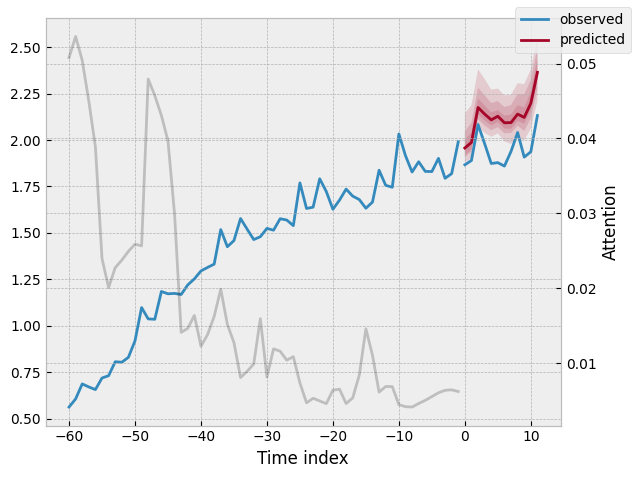

In [21]:
for idx in range(combined_series.series.nunique()):
    tft.plot_prediction(
    raw_forecasts.x,
    raw_forecasts.output,
    idx=idx,
)

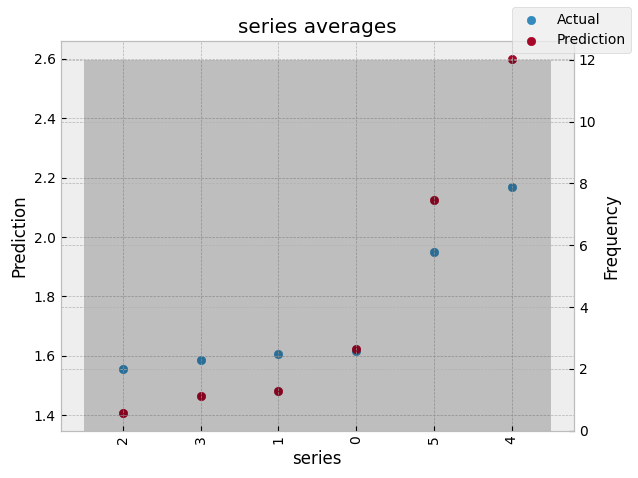

In [22]:
predictions_vs_actuals = best_tft.calculate_prediction_actual_by_variable(forecasts.x, forecasts.output)
best_tft.plot_prediction_actual_by_variable(predictions_vs_actuals, name='series');

{'attention': <Figure size 640x480 with 1 Axes>,
 'static_variables': <Figure size 700x325 with 1 Axes>,
 'encoder_variables': <Figure size 700x375 with 1 Axes>,
 'decoder_variables': <Figure size 700x300 with 1 Axes>}

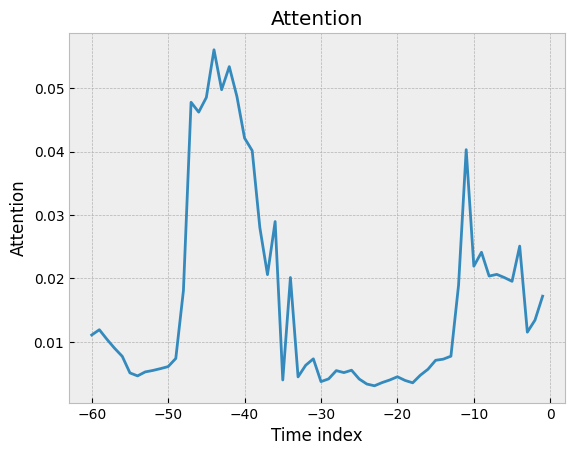

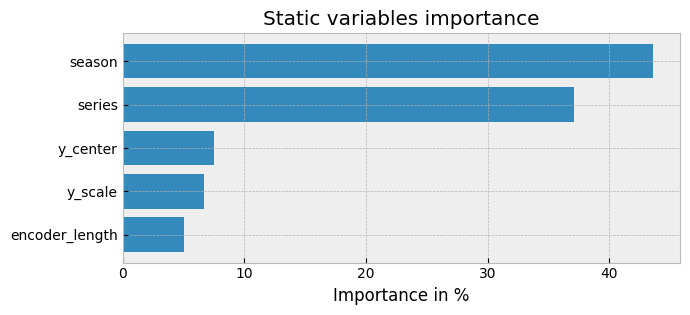

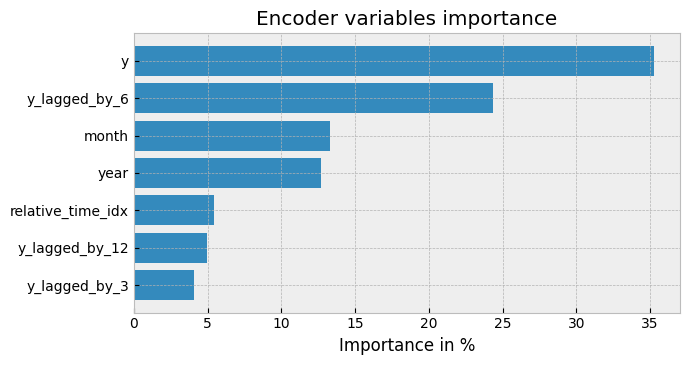

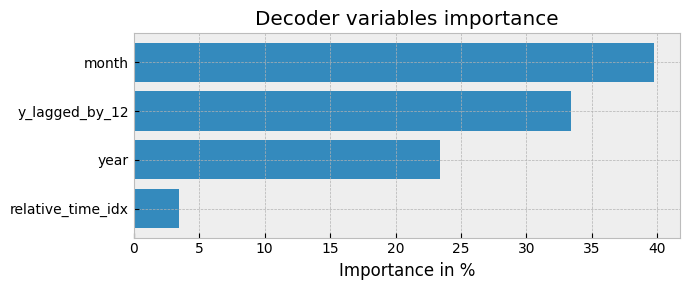

In [23]:
interpretation = best_tft.interpret_output(raw_forecasts.output, reduction="sum")
best_tft.plot_interpretation(interpretation)

In [24]:
forecasts.output

tensor([[1.6530, 1.6012, 1.5522, 1.6201, 1.6694, 1.6571, 1.6231, 1.5692, 1.5502,
         1.6098, 1.6336, 1.7398],
        [0.9531, 0.9176, 0.8252, 1.1154, 1.4232, 1.4202, 1.3139, 1.2597, 1.4144,
         1.9418, 2.4148, 2.7827],
        [0.9840, 0.7937, 0.8120, 1.5317, 1.6831, 1.4978, 1.1881, 1.0426, 1.2819,
         1.7705, 2.0231, 2.2772],
        [0.8551, 0.8614, 0.8369, 1.2015, 1.4333, 1.4509, 1.4167, 1.4229, 1.5352,
         1.8741, 2.2630, 2.4281],
        [2.2005, 2.1395, 2.1759, 2.2734, 2.3177, 2.3429, 2.4048, 2.5671, 2.9112,
         3.1775, 3.3069, 3.3769],
        [1.9571, 1.9871, 2.1752, 2.1399, 2.1088, 2.1281, 2.0930, 2.0939, 2.1397,
         2.1219, 2.1980, 2.3646]])

In [25]:
forecasts

Prediction(output=tensor([[1.6530, 1.6012, 1.5522, 1.6201, 1.6694, 1.6571, 1.6231, 1.5692, 1.5502,
         1.6098, 1.6336, 1.7398],
        [0.9531, 0.9176, 0.8252, 1.1154, 1.4232, 1.4202, 1.3139, 1.2597, 1.4144,
         1.9418, 2.4148, 2.7827],
        [0.9840, 0.7937, 0.8120, 1.5317, 1.6831, 1.4978, 1.1881, 1.0426, 1.2819,
         1.7705, 2.0231, 2.2772],
        [0.8551, 0.8614, 0.8369, 1.2015, 1.4333, 1.4509, 1.4167, 1.4229, 1.5352,
         1.8741, 2.2630, 2.4281],
        [2.2005, 2.1395, 2.1759, 2.2734, 2.3177, 2.3429, 2.4048, 2.5671, 2.9112,
         3.1775, 3.3069, 3.3769],
        [1.9571, 1.9871, 2.1752, 2.1399, 2.1088, 2.1281, 2.0930, 2.0939, 2.1397,
         2.1219, 2.1980, 2.3646]]), x={'encoder_cat': tensor([[[0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 1],
         [0, 1],
         [0, 1],
         [0, 1],
         [0, 1],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],
         [0, 0],


In [26]:
devs

price                              25.332963
anuradhapura_producer_price        12.463182
kurunegala_producer_price          12.679100
polonnaruwa_producer_price         12.710677
exchange_rate                      31.631340
m1                             244908.400742
dtype: float64

In [27]:
avgs

price                              51.705174
anuradhapura_producer_price        23.118160
kurunegala_producer_price          23.603467
polonnaruwa_producer_price         23.464080
exchange_rate                     109.999514
m1                             343322.715278
dtype: float64

In [28]:
t.shape

NameError: name 't' is not defined

In [ ]:
# Assume that the input tensor is called 't'
t = forecasts.output

# Reverse the standardization by multiplying by the standard deviation and adding back the mean
# t_reversed = [[0*t.shape[1]]*t.shape[0]]
t_reversed = [[] for _ in range(t.shape[0])]

for i in range(t.shape[0]):
    t_reversed[i] = t[i] * devs[i] + avgs[i]
    t_reversed[i] = t_reversed[i].tolist()

# Print the resulting reversed tensor
print(t_reversed)

In [ ]:
forecasted_df = pd.DataFrame(np.array(t_reversed).T, columns=df.columns[1:])
forecasted_df.insert(0, 'date', df['date'].iloc[-12:].reset_index(drop=True))
forecasted_df = forecasted_df.set_index('date')
forecasted_df.head(12)

In [ ]:
import plotly.express as px

# Create Line plot
original_df = pd.read_csv('/kaggle/input/sri-oryzaugur-dataset/imputed_processed_data.csv')

# Create a list of column names to loop through
cols_to_plot = forecasted_df.columns.tolist()

# Loop through each column and create a line plot
for col in cols_to_plot:
    # Create Line plot
    fig = px.line(original_df, x='date', y=col, template='presentation')
    fig.add_scatter(x=forecasted_df.index, y=forecasted_df[col], name=f'forecasted_{col}')

    # Add legend
    fig.update_layout(showlegend=True)

    # Display the plot
    fig.show()

In [ ]:
forecasted_df.to_csv('forecasted_data.csv', index=False)